# Training a Food Classifier


## Load and prepare Data

First we need to update the notebook to the latest version of fastai.

### Importing Libraries

In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 679.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 514.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 723.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 689.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 692.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 794.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.9 MB/s eta 0:00:00


At first we are downloading the Food101 Dataset, containing about 100k images of various kind of foods.
For all Datasets: https://course20.fast.ai/datasets.html

### Upload Data

In [ ]:
# URLs.FOOD is a predefined constant in the fastai library that provides a URL to a food-related dataset.
# This constant can be used to download a standard food dataset provided by fastai for experimentation and learning purposes.
URLs.FOOD

'https://s3.amazonaws.com/fast-ai-imageclas/food-101.tgz'

In [ ]:
# Download and extract the food-related dataset from the URL provided by URLs.FOOD.
# The untar_data function downloads the dataset if it's not already present in the local storage,
# extracts it, and returns the path to the extracted dataset. This path is stored in the variable foodPath.

foodPath = untar_data(URLs.FOOD)

In [ ]:
# If the foodPath object has a delete method, this line will call that method to delete the directory or file
# associated with foodPath. This might be used to clean up storage by removing the dataset files from the local disk.
# Note: This operation is irreversible and should be used with caution.

#foodPath.delete()

In [ ]:
# The variable foodPath holds the path to the directory where the food-related dataset, downloaded and extracted
# by the untar_data function, is stored. This path is used to access the dataset files for data loading,
# preprocessing, and any other data manipulation tasks needed for model training or analysis.

foodPath

Path('/root/.fastai/data/food-101')

In [ ]:
# The function call get_files(foodPath) retrieves a list of all files located in the directory specified by foodPath.
# This is typically used to gather the dataset files for processing, such as loading images or other data types
# stored within the directory. The foodPath variable should contain the path to the dataset's root directory.

get_files(foodPath)

(#101017) [Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/train.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/h5/food_c101_n10099_r32x32x3.h5'),Path('/root/.fastai/data/food-101/h5/food_test_c101_n1000_r64x64x1.h5'),Path('/root/.fastai/data/food-101/h5/food_test_c101_n1000_r32x32x1.h5'),Path('/root/.fastai/data/food-101/h5/food_c101_n10099_r32x32x1.h5')...]

In [ ]:
# The function call get_image_files(foodPath) specifically retrieves a list of paths to image files located within
# the directory specified by foodPath. This is used for efficiently gathering all image data for further processing,
# ensuring only image files are considered, which is particularly useful in tasks involving image classification,
# recognition, or any other form of image analysis. The foodPath variable denotes the root directory where these
# image files are stored.

get_image_files(foodPath)

(#101000) [Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1923317.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1356102.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/932725.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1907019.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/2497920.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1991096.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/1142988.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/2566914.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/206877.jpg'),Path('/root/.fastai/data/food-101/images/macaroni_and_cheese/288377.jpg')...]

<Axes: >

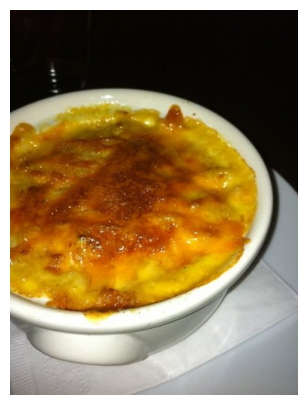

In [ ]:
# The first line creates a PILImage object from the specified image file path ('...'). This path should be replaced
# with the actual path to an image file. PILImage is a class from the fastai library that facilitates image
# manipulation and processing tasks. The create method loads an image into memory as a PILImage object.

# The second line calls the show method on the created PILImage object. This method displays the image in the
# notebook or another appropriate viewer, allowing for visual inspection of the image data. This is useful for
# verifying image content, understanding data characteristics, or simply checking the image loading process.


img=PILImage.create('/root/.fastai/data/food-101/images/macaroni_and_cheese/206877.jpg')
img.show()

In [ ]:
# This line of code counts the total number of image files within the directory specified by foodPath.
# The get_image_files function is used to gather all the image files from the directory, and len() calculates
# the total count of these files. This is useful for understanding the size of the dataset,
# particularly how many images are available for training, validation, or testing in machine learning tasks.

len(get_image_files(foodPath))

101000

In [ ]:
# Read the JSON file located at the specified path into a pandas DataFrame.
# The JSON file is expected to contain structured data, which could represent
# the training dataset for a machine learning model, especially given the path
# includes 'train.json', suggesting it's part of training data for a model.
# The contents of this DataFrame, 'df', are then displayed, providing an overview
# of the data structure and potentially the labels or features used for training.

df=pd.read_json('/root/.fastai/data/food-101/test.json')

# Display the DataFrame to inspect its contents. This could include viewing the
# first few rows of the dataset, understanding the data schema (columns), and
# getting a sense of the data types and values stored within

df

churros          hot_and_sour_soup          samosa  \
0    churros/1061830  hot_and_sour_soup/1000486  samosa/1009326   
1    churros/1064042  hot_and_sour_soup/1004564  samosa/1024186   
2    churros/1074903  hot_and_sour_soup/1011278  samosa/1036216   
3    churros/1085259  hot_and_sour_soup/1029400   samosa/103689   
4    churros/1097261  hot_and_sour_soup/1044215  samosa/1052427   
..               ...                        ...             ...   
245   churros/904526   hot_and_sour_soup/963551   samosa/917040   
246   churros/937430   hot_and_sour_soup/968546   samosa/929017   
247   churros/938480   hot_and_sour_soup/982582   samosa/937665   
248    churros/95272   hot_and_sour_soup/984258   samosa/960937   
249   churros/982131   hot_and_sour_soup/998326   samosa/972581   

             sashimi          pork_chop          spring_rolls  \
0     sashimi/100113  pork_chop/1012227  spring_rolls/1005480   
1    sashimi/1017182  pork_chop/1019077   spring_rolls/103010   
2    sashimi/1043094   pork_chop/102958  spring_rolls/1036175   
3    sashimi/1050391  pork_chop/1040432  spring_rolls/1044858   
4      sashimi/10551  pork_chop/1045605  spring_rolls/1067952   
..               ...                ...                   ...   
245   sashimi/889209    pork_chop/92293   spring_rolls/949343   
246   sashimi/893381   pork_chop/929555   spring_rolls/950371   
247   sashimi/938288   pork_chop/934946   spring_rolls/951951   
248   sashimi/981801   pork_chop/942955   spring_rolls/990689   
249   sashimi/988502   pork_chop/948226   spring_rolls/999961   

             panna_cotta          beef_tartare          greek_salad  \
0    panna_cotta/1006650   beef_tartare/101073  greek_salad/1010850   
1    panna_cotta/1027460  beef_tartare/1029120  greek_salad/1029680   
2    panna_cotta/1030883  beef_tartare/1030025  greek_salad/1053670   
3     panna_cotta/103712  beef_tartare/1031053  greek_salad/1062715   
4    panna_cotta/1050629  beef_tartare/1066933  greek_salad/1101710   
..                   ...                   ...                  ...   
245    panna_cotta/97960   beef_tartare/926143   greek_salad/949442   
246   panna_cotta/980326   beef_tartare/948352   greek_salad/961722   
247   panna_cotta/981405   beef_tartare/956509   greek_salad/968471   
248    panna_cotta/98261   beef_tartare/976175   greek_salad/995103   
249   panna_cotta/985635   beef_tartare/984112   greek_salad/995575   

             foie_gras  ...          chicken_quesadilla          pho  \
0    foie_gras/1007306  ...    chicken_quesadilla/10257  pho/1002382   
1    foie_gras/1044237  ...  chicken_quesadilla/1030292  pho/1020153   
2    foie_gras/1073688  ...  chicken_quesadilla/1052529  pho/1026354   
3    foie_gras/1113614  ...  chicken_quesadilla/1096804  pho/1028507   
4    foie_gras/1125178  ...  chicken_quesadilla/1102036  pho/1029709   
..                 ...  ...                         ...          ...   
245   foie_gras/953456  ...   chicken_quesadilla/921154   pho/964800   
246   foie_gras/961263  ...   chicken_quesadilla/924555   pho/965012   
247   foie_gras/982330  ...     chicken_quesadilla/9290   pho/982022   
248    foie_gras/98353  ...    chicken_quesadilla/94597   pho/990037   
249   foie_gras/989151  ...   chicken_quesadilla/959209   pho/996595   

             prime_rib          cheesecake          ice_cream  \
0    prime_rib/1006976  cheesecake/1023543  ice_cream/1004744   
1     prime_rib/102197   cheesecake/102854  ice_cream/1031536   
2     prime_rib/102813  cheesecake/1073148  ice_cream/1075106   
3    prime_rib/1035695  cheesecake/1092082  ice_cream/1100243   
4     prime_rib/105375  cheesecake/1096018  ice_cream/1106165   
..                 ...                 ...                ...   
245   prime_rib/940800   cheesecake/970606   ice_cream/880755   
246   prime_rib/941938   cheesecake/972877   ice_cream/891533   
247   prime_rib/956130   cheesecake/996516   ice_cream/923525   
248   prime_rib/958647   cheesecake/996918   ice_cream/9951

In [ ]:
#Show all labels

df.columns.values

array(['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop',
       'spring_rolls', 'panna_cotta', 'beef_tartare', 'greek_salad',
       'foie_gras', 'tacos', 'pad_thai', 'poutine', 'ramen',
       'pulled_pork_sandwich', 'bibimbap', 'beignets', 'apple_pie',
       'crab_cakes', 'risotto', 'paella', 'steak', 'baby_back_ribs',
       'miso_soup', 'frozen_yogurt', 'club_sandwich', 'carrot_cake',
       'falafel', 'bread_pudding', 'chicken_wings', 'gnocchi',
       'caprese_salad', 'creme_brulee', 'escargots', 'chocolate_cake',
       'tiramisu', 'spaghetti_bolognese', 'mussels', 'scallops',
       'baklava', 'edamame', 'macaroni_and_cheese', 'pancakes',
       'garlic_bread', 'beet_salad', 'onion_rings', 'red_velvet_cake',
       'grilled_salmon', 'chicken_curry', 'deviled_eggs', 'caesar_salad',
       'hummus', 'fish_and_chips', 'lasagna', 'peking_duck', 'guacamole',
       'strawberry_shortcake', 'clam_chowder', 'croque_madame',
       'french_onion_soup', 'beef_carpaccio',

### Date Preprocessing

In [ ]:
# Define variables for different food categories. These labels represent specific
# classes in a food classification task, potentially for training a machine learning model.

# labelA = 'greek_salad'
# labelB = 'hummus'
# labelC = 'cheesecake'
# labelD = 'falafel'

# labelA = 'churros'
# labelB = 'carrot_cake'
# labelC = 'mussels'
# labelD = 'chicken_quesadilla'
# labelE='pho'

# labelA = 'omelette'
# labelB = 'carrot_cake'
# labelC = 'mussels'
# labelD = 'steak'
# labelE='pho'

# labelA = 'edamame'
# labelB = 'carrot_cake'
# labelC = 'mussels'
# labelD = 'chicken_wings'
# labelE='pho'

# labelA = 'edamame'
# labelB = 'pancakes'
# labelC = 'paella'
# labelD = 'poutine'
# labelE='pho'

# labelA = 'edamame'
# labelB = 'pancakes'
# labelC = 'ice_cream'
# labelD = 'poutine'
# labelE='pho'

# labelA = 'edamame'
# labelB = 'pancakes'
# labelC = 'churros'
# labelD = 'poutine'
# labelE='pho'

# labelA = 'edamame'
# labelB = 'club_sandwich'
# labelC = 'french_fries'
# labelD = 'ravioli'
# labelE = 'pho'
# labelF = 'seaweed_salad'
# labelG = 'cheesecake'
# labelH = 'churros'

# labelA = 'edamame'
# labelB = 'club_sandwich'
# labelC = 'french_fries'
# labelD = 'ravioli'
# labelE = 'pho'
# labelF = 'seaweed_salad'
# labelG = 'cheesecake'
# labelH = 'chicken_wings'

# labelA = 'edamame'
# labelB = 'club_sandwich'
# labelC = 'steak'
# labelD = 'deviled_eggs'
# labelE = 'pho'
# labelF = 'seaweed_salad'
# labelG = 'cheesecake'
# labelH = 'chicken_wings'

# labelA = 'edamame'
# labelB = 'club_sandwich'
# labelC = 'chicken_quesadilla'
# labelD = 'deviled_eggs'
# labelE = 'pho'
# labelF = 'seaweed_salad'
# labelG = 'sushi'
# labelH = 'chicken_wings'

# labelA = 'edamame'
# labelB = 'churros'
# labelC = 'chicken_quesadilla'
# labelD = 'deviled_eggs'
# labelE = 'ramen'
# labelF = 'seaweed_salad'
# labelG = 'french_fries'
# labelH = 'strawberry_shortcake'

labelA = 'edamame'
labelB = 'churros'
labelC = 'chicken_quesadilla'
labelD = 'deviled_eggs'
labelE = 'ramen'
labelF = 'seaweed_salad'
labelG = 'waffles'
labelH = 'red_velvet_cake'


**Some Data Preperation**

Next we're gonna do some preperation to make the data handling easier. It's not important that you understand the following code snippet completly.

We're just doing two things:


1.   Removing all images that don't have labelA...labelH
2.   Renaming images with labelA or labelB to have that label in their filename



In [ ]:
# Iterate through all image files in the dataset directory. For each image, check if it belongs to one of the predefined
# categories (labels A through H). If an image belongs to a category, rename it to include the category label as a prefix.
# This helps in organizing the dataset for easier access and identification of images by category.
# If an image doesn't belong to any category, it's removed from the dataset.
# Finally, count and display the total number of images remaining after this process.


for img in get_image_files(foodPath):
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  elif labelC in str(img):
    img.rename(f"{img.parent}/{labelC}-{img.name}")
  elif labelD in str(img):
    img.rename(f"{img.parent}/{labelD}-{img.name}")
  elif labelE in str(img):
    img.rename(f"{img.parent}/{labelE}-{img.name}")
  elif labelF in str(img):
    img.rename(f"{img.parent}/{labelF}-{img.name}")
  elif labelG in str(img):
    img.rename(f"{img.parent}/{labelG}-{img.name}")
  elif labelH in str(img):
    img.rename(f"{img.parent}/{labelH}-{img.name}")
  else: os.remove(img)

len(get_image_files(foodPath))

8000

## Train Model

In [ ]:
# Define a function `GetLabel` that extracts and returns the label (category name) from a given filename.
# The filename is expected to be in the format "label-name.extension", where the label is prefixed before a hyphen.
# The function splits the filename by the hyphen and returns the first part as the label.
# For example, calling GetLabel("cheesecake-734186.jpg") will return "cheesecake", identifying the image's category.

def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("cheesecake-734186.jpg")

'cheesecake'

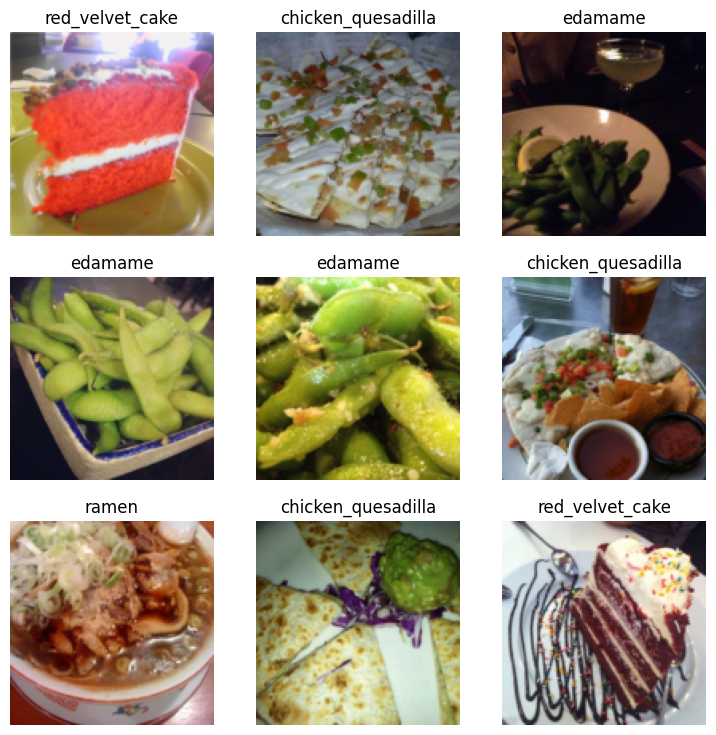

In [ ]:
"""
ImageDataLoaders in fastai simplify the process of loading and transforming data for deep learning models.
This example demonstrates setting up ImageDataLoaders for a food classification task, where images are
automatically labeled based on their filenames using a custom `GetLabel` function, resized to 128x128 for
uniformity and computational efficiency, and split into training and validation sets. A specific percentage
of the dataset is reserved for validation (valid_pct), ensuring model performance is evaluated on unseen data.
The seed parameter guarantees that the split is consistent across runs for reproducible results.
"""

dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(128))

dls.train.show_batch()

In [ ]:
# Print the size of the training set.
# `dls.train.n` provides the number of items in the training DataLoader of `dls`.
print(f"Training Set Size: {dls.train.n}")

# Print the size of the validation set.
# `dls.valid.n` gives the number of items in the validation DataLoader of `dls`.
# This helps in understanding how many images are used for model validation.
print(f"Validation Set Size: {dls.valid.n}")



Training Set Size: 6400
Validation Set Size: 1600


In [ ]:
# Initialize a Convolutional Neural Network (CNN) learner using the ResNet-34 architecture.
# The learner uses the data provided by the 'dls' ImageDataLoaders, and it is set to use pretrained weights.
# The metric used to evaluate the model's performance is the error rate, which is the fraction of incorrect predictions.
# The model is then fine-tuned for 10 epochs, which allows for model adaptation to the specific dataset while maintaining the powerful feature detection learned from the pretraining on a large dataset.

learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy], pretrained=True)
learn.fine_tune(epochs=10)

## Verify Model

### Calculate Accuracy

In [ ]:
# Get the predictions and actual targets from the validation dataset.
# 'get_preds' by default gets the predictions on the validation set.
# 'with_loss=False' means we're not interested in returning the losses, only the predictions and targets.
preds, targets = learn.get_preds(with_loss=False)

# Calculate the accuracy of the model.
# 'accuracy' is a fastai function that compares the predictions to the targets to determine
# how often the model predicts the correct label.
# 'item()' converts the accuracy, which is a single-element tensor, to a standard Python float.
acc = accuracy(preds, targets).item()

# Print the re-computed validation accuracy to four decimal places.
# This gives a precise view of the model's performance.
print(f"Model Accuracy: {acc*100:.2f}%")




Model Accuracy Accuracy: 92.81%


### Upload your own Images

Saving Screenshot 2024-03-18 014930.png to Screenshot 2024-03-18 014930.png


This is a french_fries.

chicken_wings 0.00%
cheesecake 0.00%
edamame 0.00%
club_sandwich 0.00%
french_fries 100.00%
pho 0.00%
ravioli 0.00%
seaweed_salad 0.00%


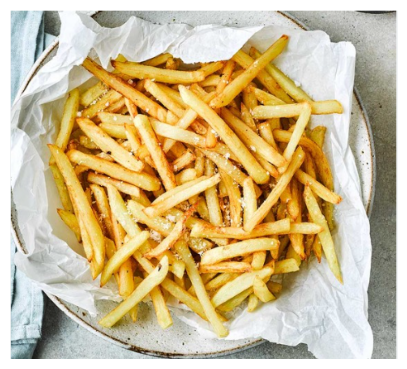

In [ ]:
# This code is designed to upload a new image file in a Google Colab environment, display it,
# and use a pre-trained CNN model to predict its label. First, it imports the file upload module from
# google.colab. Then, it initiates the file upload process, allowing the user to select a file from their system.
# Once uploaded, it iterates over the uploaded files (although typically there would be just one),
# and creates an image object using the PIL library from the uploaded file.
# The image is then displayed inline within the Colab notebook.
# After displaying the image, the pre-trained 'learn' model (assumed to be a fastai Learner object)
# makes a prediction on the image, returning the predicted label, the class index (ignored here with _),
# and the probabilities for each class. Finally, it prints out the most likely label of the image according to the model.


from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"\n{labelH} {probs[1].item()*100:.2f}%")
print(f"{labelG} {probs[0].item()*100:.2f}%")
print(f"{labelA} {probs[3].item()*100:.2f}%")
print(f"{labelB} {probs[2].item()*100:.2f}%")
print(f"{labelC} {probs[4].item()*100:.2f}%")
print(f"{labelE} {probs[5].item()*100:.2f}%")
print(f"{labelD} {probs[6].item()*100:.2f}%")
print(f"{labelF} {probs[7].item()*100:.2f}%")


#print(probs)

### Test using images in dataset

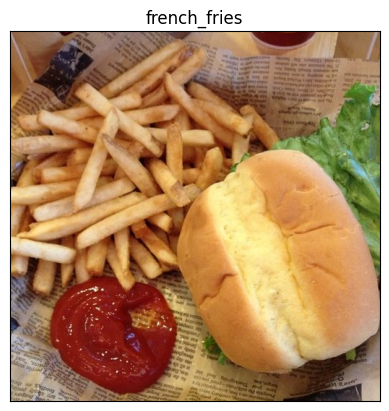

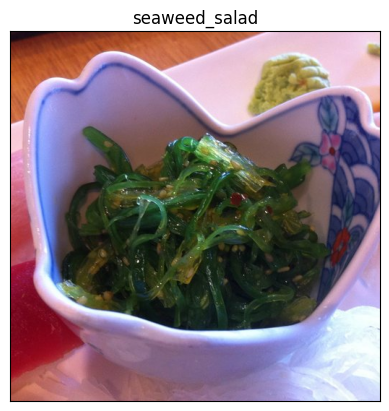

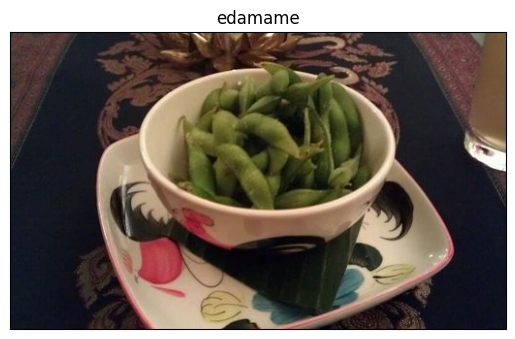

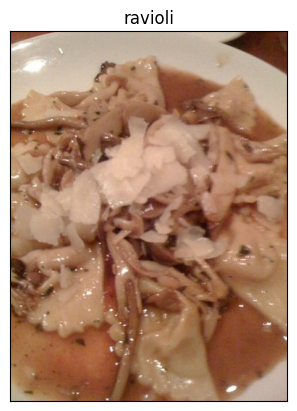

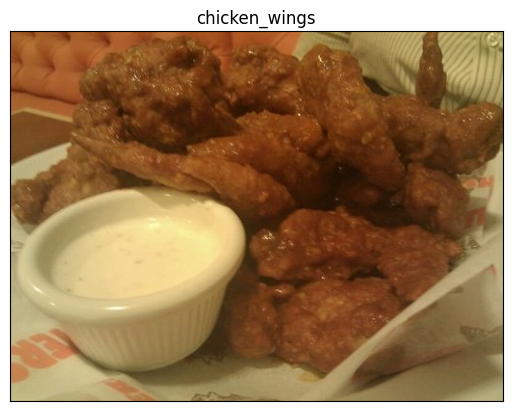

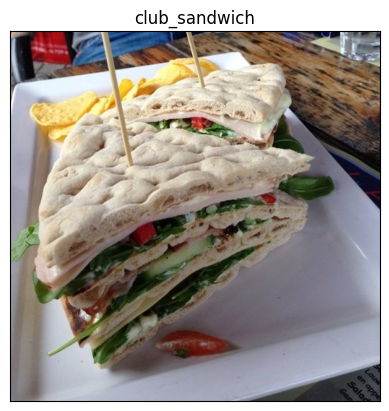

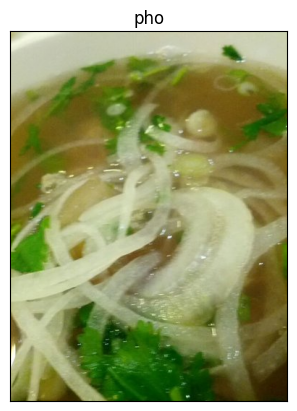

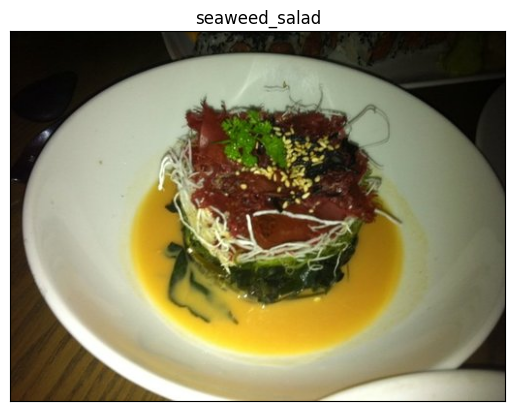

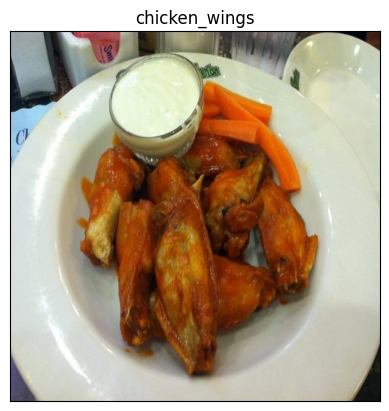

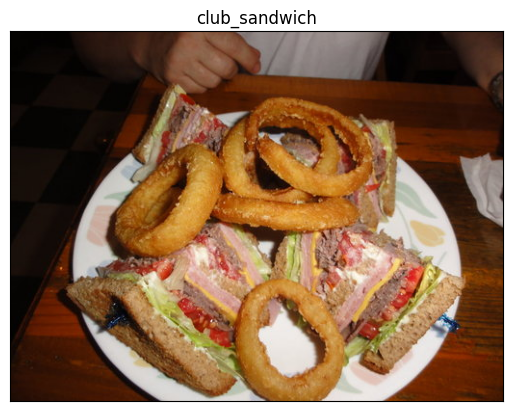

In [ ]:
# This code block is designed to display predictions for 10 random images from the dataset located at foodPath.
# It uses the matplotlib library for visualization and the trained model 'learn' for prediction.
# For each image, the code does the following:
# 1. Randomly selects an index to pick an image file from the dataset.
# 2. Reads the image file and converts it into a format suitable for display and prediction.
# 3. Uses the model 'learn' to predict the label of the loaded image.
# 4. Creates a new figure and subplot for each image using matplotlib.
# 5. Displays the image and sets the predicted label as the title of the subplot.
# 6. Removes the x and y-axis labels to focus on the image and its predicted label.


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

### Confusion Matrix

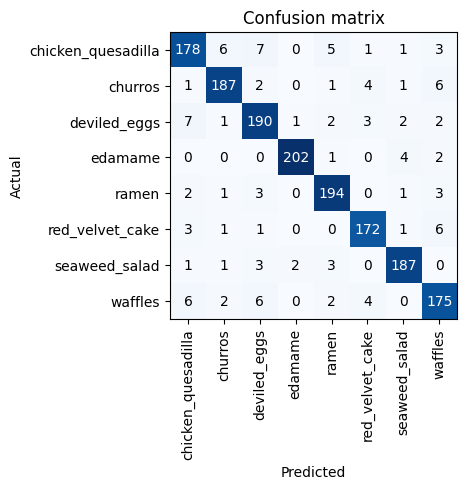

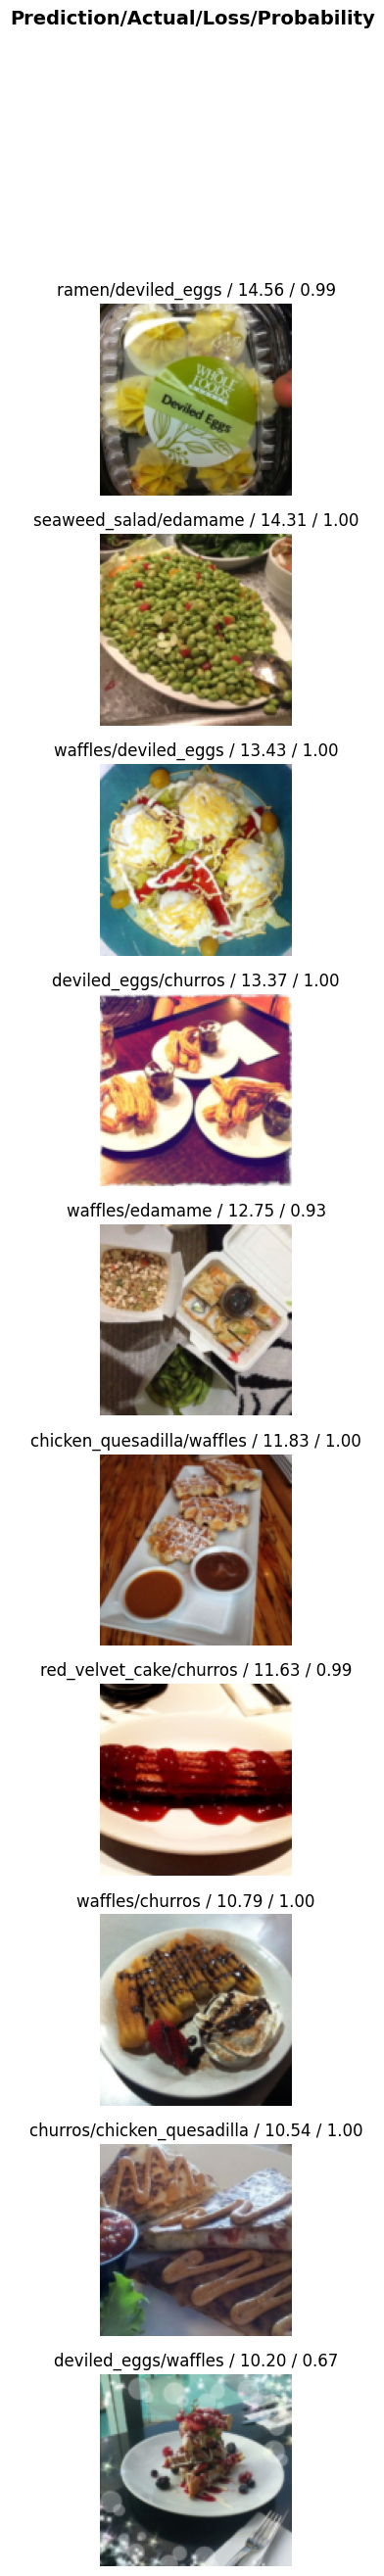

In [ ]:
# Create an interpretation object 'interp' for the trained model 'learn' to analyze its performance.
# The ClassificationInterpretation class provides various methods to visualize and understand the model's predictions.
# 'plot_confusion_matrix()' is called on the interpretation object to display the confusion matrix,
# which helps in identifying the areas where the model is confusing one class for another.
# 'plot_top_losses()' is used to show the images that the model was most uncertain about,
# displaying the 10 images with the highest loss, which can be useful for identifying mislabeled data
# or understanding where the model is making mistakes.


interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(10, nrows=10)

## Deploy

In [ ]:
# Save the trained model 'learn' to disk using its built-in 'export' method.
# This will create a file, usually named 'export.pkl', containing the architecture,
# weights, and optimizer state, allowing for easy deployment or transfer of the model.

learn.export()

In [ ]:
# Save the trained model 'learn' to disk using its built-in 'export' method.
# This will create a file, usually named 'export.pkl', containing the architecture,
# weights, and optimizer state, allowing for easy deployment or transfer of the model.

modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [ ]:
# Load a previously trained and exported model from 'modelPath' for inference purposes and store it in 'learn_inf'.
# Then, use the 'predict' method of this inference learner to make a prediction on the first image file in 'foodPath'.
# The image is read into memory using matplotlib's 'imread' function, which prepares it for the prediction step.


learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0]))

('french_fries',
 tensor(4),
 tensor([2.8777e-05, 2.0534e-05, 1.4203e-06, 3.1576e-05, 9.9990e-01, 9.3519e-06,
         4.8240e-07, 6.5819e-06]))

In [ ]:
# Access the 'vocab' attribute of the DataLoaders associated with the 'learn_inf' inference learner.
# The 'vocab' represents the classes that the model can predict, providing a list of all the possible labels
# the model was trained to recognize.

learn_inf.dls.vocab

['cheesecake', 'chicken_wings', 'club_sandwich', 'edamame', 'french_fries', 'pho', 'ravioli', 'seaweed_salad']

In [ ]:
# Utilize the 'download' function from the 'files' module of Google Colab to download the trained model file
# specified by 'modelPath' from the Colab environment to the local machine.
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>